In [1]:
from LunarSolarConverter.LunarSolarConverter import LunarSolarConverter, Solar, pprint

from datetime import datetime
from datetime import timedelta  
import numpy as np
import matplotlib.pyplot as plt


In [2]:
JIN = 0
MU = 1
TU = 2
SHUI = 3
HUO = 4

gua_map = [('KUN', TU), 
           ('QIAN', JIN), 
           ('DUI', JIN), 
           ('LI', HUO), 
           ('ZHEN', MU), 
           ('XUN', MU), 
           ('KAN', SHUI), 
           ('GEN', TU)]

xiangke_map = [(JIN, MU),
               (MU, TU),
              (TU, SHUI),
              (SHUI, HUO),
              (HUO, JIN)]


def is_xiang_ke(gua1, gua2):
    wu_xing1 = gua_map[gua1][1]
    wu_xing2 = gua_map[gua2][1]
    
    for xiangke in xiangke_map:
        if wu_xing1 == xiangke[0] and wu_xing2 == xiangke[1]:
            return True
    return False
    

In [3]:
GOODTIME = 1
BADTIME = -1
SOSOTIME = 0

def get_time_type(year, month, day, shichen):
    solar = Solar(year, month, day)

    converter = LunarSolarConverter()
    lunar = converter.SolarToLunar(solar)
    pprint(vars(lunar))
    
    upper_gua = (lunar.lunarYear + 
                 lunar.lunarMonth + 
                 lunar.lunarDay) % 8
    
    
    lower_gua = (lunar.lunarYear + 
                 lunar.lunarMonth + 
                 lunar.lunarDay + 
                 shichen) % 8
    
    dong_yao =  (lunar.lunarYear + 
                 lunar.lunarMonth + 
                 lunar.lunarDay + 
                 shichen) % 6
    
    if dong_yao % 2 == 0:
        is_shang_yao = True
        ti = lower_gua
        yong = upper_gua
    else:
        is_shang_yao = False
        ti = upper_gua
        yong = lower_gua
        
    if is_xiang_ke(ti, yong):
        return GOODTIME
    elif is_xiang_ke(yong, ti):
        return BADTIME
    else:
        return SOSOTIME
    
    
        
        
    

In [4]:
data = np.zeros((12, 7))

for i in range(7):
    date = datetime.now() + timedelta(days=i)
    for j in range(12):
        time_type = get_time_type(date.year, date.month, date.day, j)
        print("date: {} shichen:{}, time_type:{}".format(date, i, time_type))
        data[j,i] = time_type

{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 11:28:13.614158 shichen:0, time_type:0
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 11:28:13.614158 shichen:0, time_type:0
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 11:28:13.614158 shichen:0, time_type:1
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 11:28:13.614158 shichen:0, time_type:-1
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 11:28:13.614158 shichen:0, time_type:-1
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 11:28:13.614158 shichen:0, time_type:1
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 11:28:13.614158 shichen:0, time_type:0
{'isleap': False, 'lunarDay': 13, 'lunarMonth': 5, 'lunarYear': 2019}
date: 2019-06-15 11:28:13.614158 shichen:0, ti

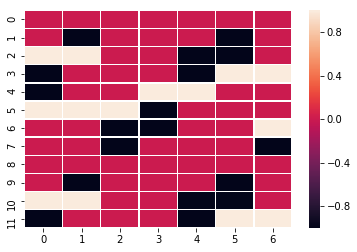

In [5]:
import seaborn as sns
ax = sns.heatmap(data, linewidth=0.5)
#plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

In [6]:
import pandas as pd

# load the stock data
df=pd.read_csv('data/data-1560586773044.csv',  sep=',')
df['timestamp'] = pd.to_datetime(df['time_stamp'], format="%Y-%m-%d %H:%M:%S").dt.tz_convert('CET')

In [7]:
df['rate'] = (df['last'] - df['open']) / df['open']
df

,stock_id,time_stamp,open,high,low,last,volume,timestamp,rate
0,0,2019-05-24 07:00:00+00,592.614,592.614,592.610,592.610,0,2019-05-24 09:00:00+02:00,-0.000007
1,0,2019-05-24 07:01:00+00,593.670,593.672,593.670,593.672,0,2019-05-24 09:01:00+02:00,0.000003
2,0,2019-05-24 07:02:00+00,594.160,594.160,594.160,594.160,0,2019-05-24 09:02:00+02:00,0.000000
3,0,2019-05-24 07:03:00+00,594.140,594.140,594.138,594.138,0,2019-05-24 09:03:00+02:00,-0.000003
4,0,2019-05-24 07:04:00+00,594.300,594.300,594.296,594.296,0,2019-05-24 09:04:00+02:00,-0.000007
5,0,2019-05-24 07:05:00+00,594.350,594.350,594.350,594.350,0,2019-05-24 09:05:00+02:00,0.000000
6,0,2019-05-24 07:06:00+00,594.660,594.663,594.660,594.663,0,2019-05-24 09:06:00+02:00,0.000005
7,0,2019-05-24 07:07:00+00,594.770,594.770,594.767,594.767,0,2019-05-24 09:07:00+02:00,-0.000005
8,0,2019-05-24 07:08:00+00,594.442,594.442,594.440,594.440,0,2019-05-24 09:08:00+02:00,-0.000003
9,0,2019-05-24 07:09:00+00,594.305,594.630,594.305,594.627,0,2019-05-24 09:09:00+02:00,0.000542


In [8]:
def func(timestamp):
    shichen = timestamp.hour // 2
    
    time_type = get_time_type(timestamp.year, timestamp.month, timestamp.day, shichen)
    if time_type == 1:
        print("GOOD")
    return time_type

time_type = df['timestamp'].apply(func)

{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 20, 'lunarMonth': 4, 'lunarYear': 2019}
{'isleap': False, 'l

{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 1, '

{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 3, '

{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, 'lunarMonth': 5, 'lunarYear': 2019}
{'isleap': False, 'lunarDay': 9, '

In [9]:
df['time_type'] = time_type

In [10]:
good_time_rate = df[df['time_type']==1]['rate']

In [11]:
bad_time_rate = df[df['time_type']==-1]['rate']

In [12]:
bad_time_rate

284     0.000000
285     0.000007
286    -0.000002
287     0.000005
288     0.000003
289    -0.000007
290    -0.000002
291    -0.000008
292    -0.000003
293    -0.000005
294     0.000007
295     0.000007
296     0.000000
297    -0.000007
298    -0.000002
299     0.000008
300     0.000007
301    -0.000008
302    -0.000003
303    -0.000002
304     0.000003
305     0.000003
306    -0.000005
307    -0.000005
308     0.000008
309    -0.000007
310     0.000000
311     0.000005
312    -0.000074
313     0.000008
          ...   
6007   -0.000002
6008    0.000008
6009    0.000007
6010   -0.000003
6011    0.000000
6012   -0.000002
6013    0.000005
6014   -0.000007
6015   -0.000003
6016   -0.000005
6017   -0.000276
6018   -0.000002
6019    0.000003
6020   -0.000005
6021   -0.000005
6022    0.000003
6023   -0.000003
6024    0.000003
6025    0.000005
6026    0.000000
6027    0.000007
6028   -0.000003
6029    0.000008
6030   -0.000003
6031    0.000008
6032    0.000008
6033    0.000005
6034   -0.0000

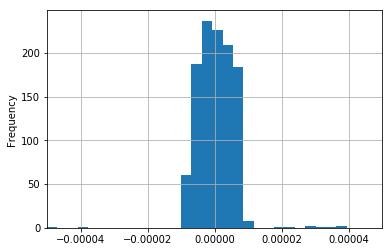

In [38]:
ax = bad_time_rate.plot.hist(grid=True,bins=600, xlim=(-0.00005,0.00005))

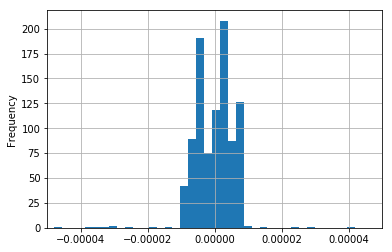

In [39]:
ax = good_time_rate.plot.hist(grid=True,bins=600, xlim=(-0.00005,0.00005))

In [15]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(good_time_rate,bad_time_rate, value=0,alternative='two-sided')
print(float(pval1))

0.25436317650897977


In [17]:
good_time_rate.mean()

3.6352078115687754e-06

In [22]:
good_time_rate.std()

6.567826747163818e-05

In [18]:
bad_time_rate.mean()

3.2584534955688434e-07

In [23]:
bad_time_rate.std()

6.936061332359802e-05